To download stock data for a specific sector like Biotechnology and a cryptocurrency like Bitcoin for a specified period (January 2018 to January 2023) using Yahoo Finance, you can use the yfinance Python library. 

pip install yfinance


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

from dotenv import load_dotenv
load_dotenv()

import os
api_key_nasdaq = os.getenv('api_key_nasdaq')
fre_api = os.getenv('fre_api')


In [2]:
# Define the tickers
biotech_tickers = ['IBB', 'PFE', 'MRNA', 'JNJ']  # Tickers for IBB, Pfizer, Moderna, and Johnson & Johnson
bitcoin_ticker = 'BTC-USD'  # Ticker for Bitcoin in USD
start_date = '2018-01-01'
end_date = '2023-01-01'


# Download the data for biotech companies
biotech_data = yf.download(biotech_tickers, start=start_date, end=end_date)['Adj Close']

# Download the data for Bitcoin
bitcoin_data = yf.download(bitcoin_ticker, start=start_date, end=end_date)['Adj Close']

# Combine the data into a single dataframe
combined_data = pd.concat([biotech_data, bitcoin_data], axis=1)
combined_data.columns = biotech_tickers + ['Bitcoin']


# combined_data now contains the historical data for the specified period with date as the index
combined_data

[*********************100%%**********************]  4 of 4 completed
[*********************100%%**********************]  1 of 1 completed


,IBB,PFE,MRNA,JNJ,Bitcoin
Date,,,,,
2018-01-01,NaN,NaN,NaN,NaN,13657.200195
2018-01-02,107.904404,118.394844,NaN,27.571003,14982.099609
2018-01-03,109.424171,119.525818,NaN,27.775295,15201.000000
2018-01-04,108.526123,119.517326,NaN,27.835823,15599.200195
2018-01-05,108.387978,120.503746,NaN,27.888783,17429.500000
...,...,...,...,...,...
2022-12-27,129.034180,172.204422,180.169998,48.910797,16717.173828
2022-12-28,128.155792,171.457123,176.500000,48.595116,16552.572266
2022-12-29,131.100403,172.330612,178.860001,49.102116,16642.341797


In [3]:
df=combined_data.resample("M").last()
df.head()

,IBB,PFE,MRNA,JNJ,Bitcoin
Date,,,,,
2018-01-31,112.582161,117.510452,NaN,28.024981,10221.099609
2018-02-28,106.660927,111.151260,NaN,27.727161,10397.900391
2018-03-31,105.338547,109.670708,NaN,27.100996,6973.529785
2018-04-30,102.289124,108.250084,NaN,27.956251,9240.549805
2018-05-31,107.026070,103.129997,NaN,27.704821,7494.169922


In [4]:
combined_data.iloc[28:34,:]

,IBB,PFE,MRNA,JNJ,Bitcoin
Date,,,,,
2018-01-29,116.944138,122.178917,NaN,29.523073,11296.400391
2018-01-30,114.743416,121.115997,NaN,28.600002,10106.299805
2018-01-31,112.582161,117.510452,NaN,28.024981,10221.099609
2018-02-01,112.483482,119.066635,NaN,28.124247,9170.540039
2018-02-02,110.667648,117.076775,NaN,27.956251,8830.750000
2018-02-03,NaN,NaN,NaN,NaN,9174.910156


In order to gain a comprehensive understanding of the function mentioned above, it is necessary to engage in a thorough analysis and examination of its components and functionality.The function resample() is used to perform resampling on a dataset. One can easily discover various methods by conducting a simple search on a search engine such as Google. 

In fact, I have already found a [link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html) on the first page of the search results. Allow me to go over the content of this link with you, but I do anticipate that you will take the initiative to thoroughly comprehend how these functions operate, particularly when you are perusing GitHub repositories or reading fragments of your textbook independently. 

It is crucial to acknowledge that ChatGPT may not be beneficial in assisting you with comprehending the code. It is often advantageous to engage in hands-on experimentation when working with code.

In [5]:
# The following code creates a Pandas series object with a datetime index that starts at ‘1/1/2000’ and ends at ‘1/1/2000 00:08:00’ with a frequency of 1 minute (freq='T'). The series contains integers from 0 to 8.
index = pd.date_range('1/1/2000', periods=9, freq='T')
series = pd.Series(range(9), index=index)
series

2000-01-01 00:00:00    0
2000-01-01 00:01:00    1
2000-01-01 00:02:00    2
2000-01-01 00:03:00    3
2000-01-01 00:04:00    4
2000-01-01 00:05:00    5
2000-01-01 00:06:00    6
2000-01-01 00:07:00    7
2000-01-01 00:08:00    8
Freq: T, dtype: int64

In [6]:
# The resample method is then called on the series object with a rule of ‘3T’, which means that the data is resampled to 3-minute intervals.
# The sum method is then called on the resampled data to get the sum of each 3-minute interval.
series.resample('3T').sum()

2000-01-01 00:00:00     3
2000-01-01 00:03:00    12
2000-01-01 00:06:00    21
Freq: 3T, dtype: int64

In [7]:
# Resample the data to 3-minute intervals and get the last value of each interval
series.resample('3T').last()

2000-01-01 00:00:00    2
2000-01-01 00:03:00    5
2000-01-01 00:06:00    8
Freq: 3T, dtype: int64

As we can observe, there exists a distinction between the methods last() and sum(). To gain a comprehensive understanding of the implications of the code line combined_data.resample("M").last(), it is essential to execute the aforementioned code. 

Sometimes, students may encounter situations that are not as straightforward as they initially appear. In such cases, it is important to engage in independent practise in order to fully grasp and appreciate the complexity of the topic at hand. 

In [8]:
# Calculate simple returns for each column in the DataFrame 'df'
df_simple_return = df.pct_change()

# Add a suffix ' Simple Return' to each column name using the insert method
df_simple_return.columns = [col + " Simple Return" for col in df_simple_return.columns]


# Display the resulting DataFrame
df_simple_return.head()


,IBB Simple Return,PFE Simple Return,MRNA Simple Return,JNJ Simple Return,Bitcoin Simple Return
Date,,,,,
2018-01-31,NaN,NaN,NaN,NaN,NaN
2018-02-28,-0.052595,-0.054116,NaN,-0.010627,0.017298
2018-03-31,-0.012398,-0.013320,NaN,-0.022583,-0.329333
2018-04-30,-0.028949,-0.012954,NaN,0.031558,0.325089
2018-05-31,0.046309,-0.047299,NaN,-0.008994,-0.188991


In [9]:
df_log_return= np.log(df/df.shift(1))
# Add a suffix ' Simple Return' to each column name using the insert method
df_log_return.columns = [col + " log Return" for col in df_log_return.columns]
df_log_return.head()

,IBB log Return,PFE log Return,MRNA log Return,JNJ log Return,Bitcoin log Return
Date,,,,,
2018-01-31,NaN,NaN,NaN,NaN,NaN
2018-02-28,-0.054028,-0.055635,NaN,-0.010684,0.017150
2018-03-31,-0.012475,-0.013410,NaN,-0.022842,-0.399482
2018-04-30,-0.029376,-0.013038,NaN,0.031070,0.281480
2018-05-31,0.045269,-0.048454,NaN,-0.009034,-0.209476


# Visualize

To plot the financial time series data you provided using Seaborn in Python, you can follow these steps. The data includes log returns for various assets over time. We'll create a line plot for each asset to visualize how their log returns change over time.



# Install libraries 
!pip install seaborn matplotlib

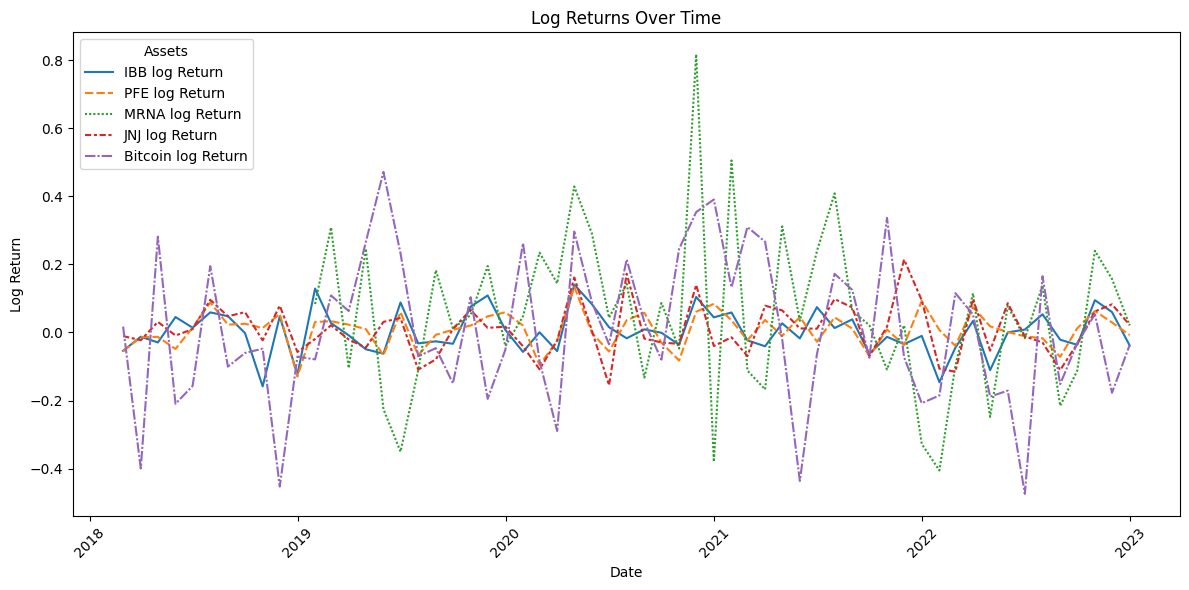

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_log_return)
plt.title('Log Returns Over Time')
plt.ylabel('Log Return')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend(title='Assets', loc='upper left')
plt.tight_layout()
plt.show()


# Adjusting for Inflation

* Realistic Performance Evaluation: Adjusting returns for inflation provides a more accurate assessment of an investment's performance, reflecting the true increase or decrease in purchasing power, rather than just the nominal return.
* Comparability and Decision Making: It allows for meaningful comparisons of investment returns across different time periods with varying inflation rates, aiding in more informed investment decisions and strategy formulation.
* Risk and Long-term Planning: Inflation-adjusted returns are crucial for assessing the real risk of investments and for accurate long-term financial planning, such as retirement savings, ensuring that goals are met without the erosion of purchasing power.



In [11]:
import nasdaqdatalink as nsdk
# Load API key from environment variable
nsdk.ApiConfig.api_key = api_key_nasdaq


# Fetch CPI data from Nasdaq Data Link
df_cpi = nsdk.get(dataset="FRED/CPIAUCSL", start_date=start_date, end_date=end_date).rename(columns={"Value": "cpi"})

# Display the first few rows of the dataframe
df_cpi.head()


,cpi
Date,
2018-01-01,248.743
2018-02-01,249.439
2018-03-01,249.581
2018-04-01,250.146
2018-05-01,250.779


In [15]:
# What if?

When unable to locate the desired information, it is advisable to explore alternative data providers. In my situation, I discovered that I could utilise the Fred API for my search. You can also consider conducting a search using popular search engines such as Google. 

In order to explore alternative methods for obtaining an API for your account and utilising it in Python, one could consider various approaches. It is important to note that these alternative methods should be explored after thoroughly understanding the traditional process of acquiring an API and integrating it into your Python code.

SyntaxError: invalid syntax (826834171.py, line 3)

In [14]:

from fredapi import Fred
import pandas as pd


# Initialize the Fred client
fred = Fred(api_key=fre_api)


# Fetch CPI data
# Note: You need to know the exact series ID for CPI. For example, "CPIAUCSL" is one such ID for CPI for All Urban Consumers.
cpi_data = fred.get_series('CPIAUCSL', observation_start=start_date, observation_end=end_date)

# Convert to DataFrame for easier handling
df_cpi = pd.DataFrame(cpi_data, columns=['CPI'])

# Display the first few rows of the dataframe
df_cpi.head()


,CPI
2018-01-01,248.859
2018-02-01,249.529
2018-03-01,249.577
2018-04-01,250.227
2018-05-01,250.792


In [17]:
pip install forex_python

Note: you may need to restart the kernel to use updated packages.


In [18]:
from forex_python.converter import CurrencyRates

c = CurrencyRates()
amount_in_eur = 10000  # Example amount in EUR
eur_to_usd_rate = c.get_rate('EUR', 'USD')  # Get current EUR to USD rate
amount_in_usd = amount_in_eur * eur_to_usd_rate
print(f"€{amount_in_eur} is equivalent to ${amount_in_usd:.2f}")


€10000 is equivalent to $10670.00
